In [2]:
txt = '/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/2011_09_26/calib_cam_to_cam.txt'

In [3]:
import numpy as np

In [4]:
with open(txt) as file:
    for line in file:
        if line[0:9] == 'R_rect_00':
            R0_rect = np.matrix(line[10:]).reshape(3,3)
            R0_rect = np.insert(R0_rect,3,values=[0,0,0],axis=0)
            R0_rect = np.insert(R0_rect,3,values=[0,0,0,1],axis=1)
        

In [5]:
R0_rect

matrix([[ 0.9999239 ,  0.00983776, -0.00744505,  0.        ],
        [-0.0098698 ,  0.9999421 , -0.00427846,  0.        ],
        [ 0.00740253,  0.00435161,  0.9999631 ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [6]:
R = '7.533745e-03 -9.999714e-01 -6.166020e-04 1.480249e-02 7.280733e-04 -9.998902e-01 9.998621e-01 7.523790e-03 1.480755e-02'
R = np.matrix(R).reshape(3,3)
R

matrix([[ 7.533745e-03, -9.999714e-01, -6.166020e-04],
        [ 1.480249e-02,  7.280733e-04, -9.998902e-01],
        [ 9.998621e-01,  7.523790e-03,  1.480755e-02]])

In [7]:
T = '-4.069766e-03 -7.631618e-02 -2.717806e-01'
T = np.matrix(T).reshape(3,1)
T

matrix([[-0.00406977],
        [-0.07631618],
        [-0.2717806 ]])

In [8]:
TR = np.hstack((R,T))
TR = np.insert(TR,3,values=[0,0,0,1],axis=0)
TR

matrix([[ 7.533745e-03, -9.999714e-01, -6.166020e-04, -4.069766e-03],
        [ 1.480249e-02,  7.280733e-04, -9.998902e-01, -7.631618e-02],
        [ 9.998621e-01,  7.523790e-03,  1.480755e-02, -2.717806e-01],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [9]:
a = 'R: 7.533745e-03 -9.999714e-01 -6.166020e-04 1.480249e-02 7.280733e-04 -9.998902e-01 9.998621e-01 7.523790e-03 1.480755e-02'
a[2:]

' 7.533745e-03 -9.999714e-01 -6.166020e-04 1.480249e-02 7.280733e-04 -9.998902e-01 9.998621e-01 7.523790e-03 1.480755e-02'

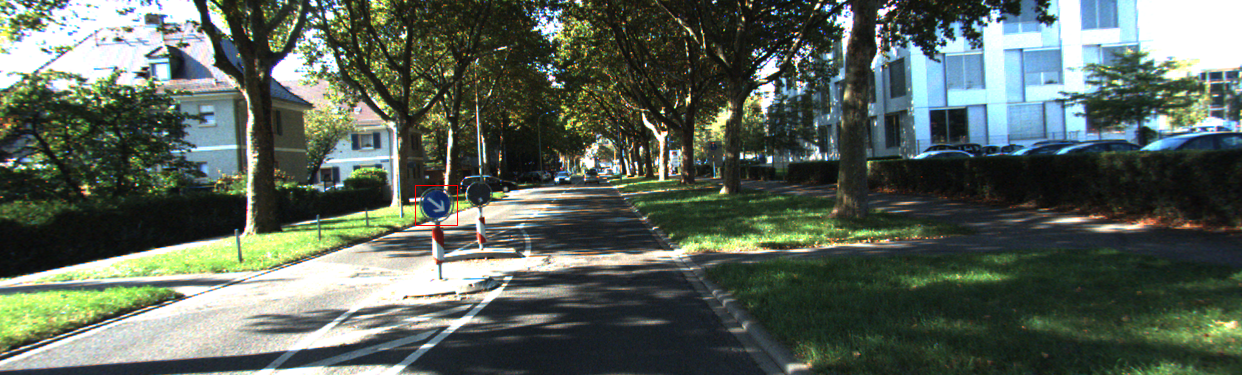

In [10]:
from PIL import Image
from PIL import ImageDraw
points_inbox = Image.open('/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/image_02/data/0000000255.png')
pinb = ImageDraw.ImageDraw(points_inbox)

box_lx = 415
box_ly = 185
box_rx = 457
box_ry = 225

pinb.rectangle(((box_lx, box_ly), (box_rx, box_ry)),
                   fill=None, outline=(255, 0, 0), width=1)


points_inbox

In [11]:
import open3d as o3d

In [12]:
pcd = o3d.io.read_point_cloud("/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/test.pcd")

In [13]:
type(pcd)

open3d.cpu.pybind.geometry.PointCloud

In [14]:
dataset = o3d.data.PCDPointCloud()
pcd = o3d.io.read_point_cloud(dataset.path)

In [15]:
np.asarray(pcd.normals)

array([[ 0.96546179, -0.08612899,  0.24589692],
       [ 0.96990991, -0.07807195,  0.23060687],
       [ 0.98010278, -0.0494331 ,  0.1922366 ],
       ...,
       [ 0.1124642 , -0.29930896, -0.94750512],
       [-0.22163554, -0.13258037, -0.96607459],
       [ 0.23076308, -0.01283119, -0.97292531]])

In [21]:
pcd = o3d.io.read_point_cloud('/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/outpoints/0000000255.txt',format='pts')

[Open3D WARNING] Read PTS: only points and colors attributes are supported.


In [22]:
pcd.normals

std::vector<Eigen::Vector3d> with 0 elements.
Use numpy.asarray() to access data.

In [18]:
o3d.io.write_point_cloud("/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/outpoints/0000000255.pcd", pcd)

True

In [35]:
a = np.loadtxt('/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/outpoints/0000000255.txt')
a[:,0:3]
positions = a[:,0:3]
intensities = a[:,3]

In [38]:
pcdt = o3d.t.geometry.PointCloud()
pcdt.point['positions'] = o3d.core.Tensor(positions)
pcdt.point['intensities'] = o3d.core.Tensor(intensities.reshape(-1,1))
print(pcdt)

o3d.t.io.write_point_cloud("test.pcd", pcdt) 

PointCloud on CPU:0 [186 points (Float64)] Attributes: intensities (dtype = Float64, shape = {186, 1}).


True